In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use("bmh")

# 1: Implement 2d image convolution

It's ok to handle the boundary of the image in whatever way you prefer.

In [2]:
def convolution_2d(stencil, image):
    stencil_height = len(stencil)
    stencil_width = len(stencil)
    new_image = np.zeros((len(image), len(image[0])))
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i, j] = np.sum(
                stencil * image[i:i+stencil_height, j:j+stencil_width]
            )
    return new_image

# Test it

Test your code with the given stencil.

In [3]:
# generates a random test image
def make_test_image(N=512):
    X = np.random.randint(0, 64, (N, N))

    for k in range(6):
        i0, j0 = np.random.randint(0, N-32, 2)
        i1 = np.random.randint(i0 + 8, N)
        j1 = np.random.randint(j0 + 8, N)
        X[i0 : i1, j0 : j1] = np.cumsum(
            np.random.randint(0, 6, (i1 - i0, j1 - j0)),
            axis=k%2
        )
    X = np.minimum(X, 255)
    return X

<IPython.core.display.Javascript object>


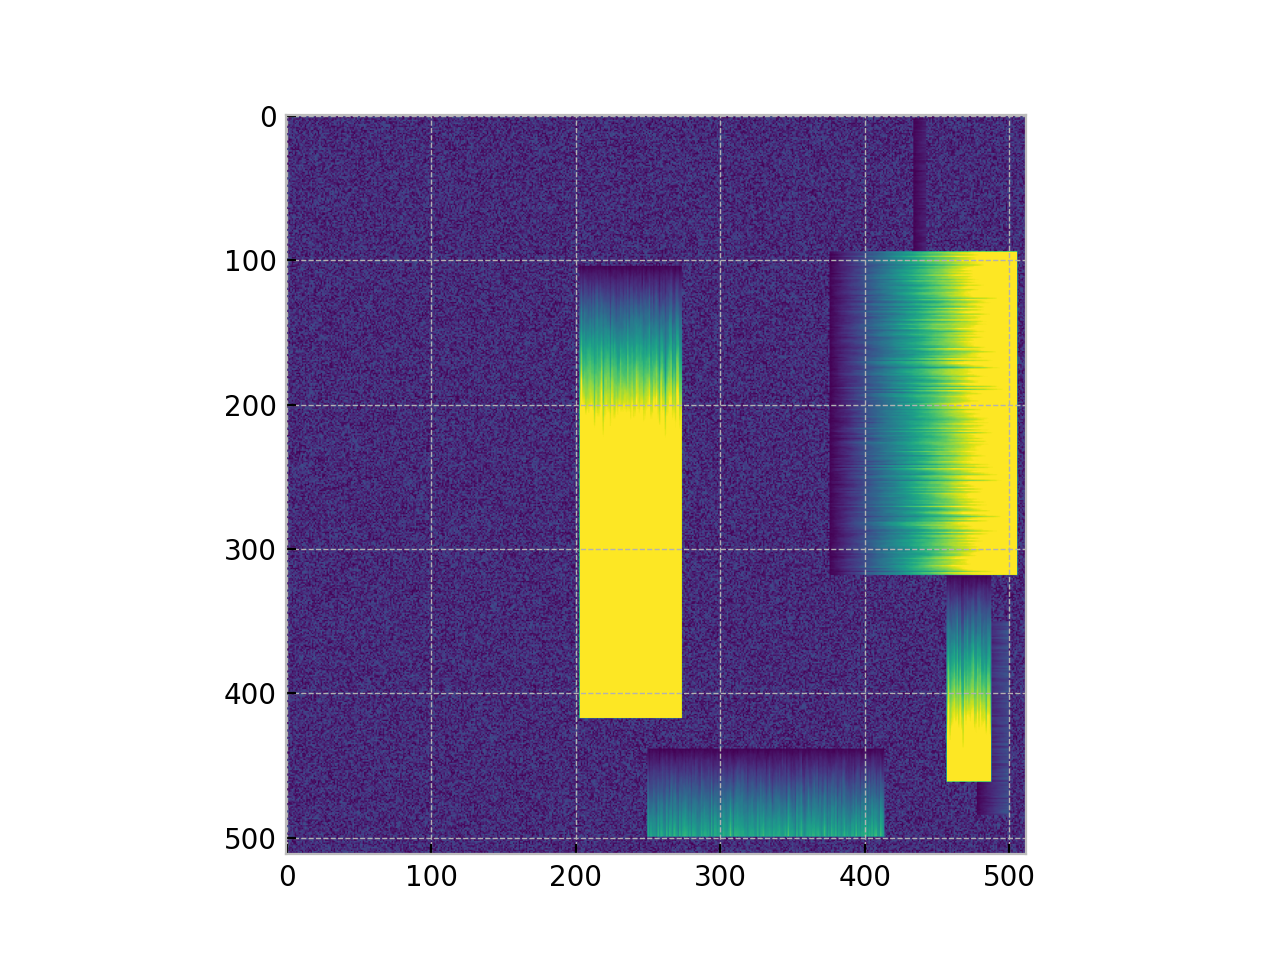

In [4]:
image = make_test_image()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image)

In [5]:
stencil = np.array([[-1, 0], [0, 1]])

In [6]:
conv = convolution_2d(stencil, image)

<IPython.core.display.Javascript object>


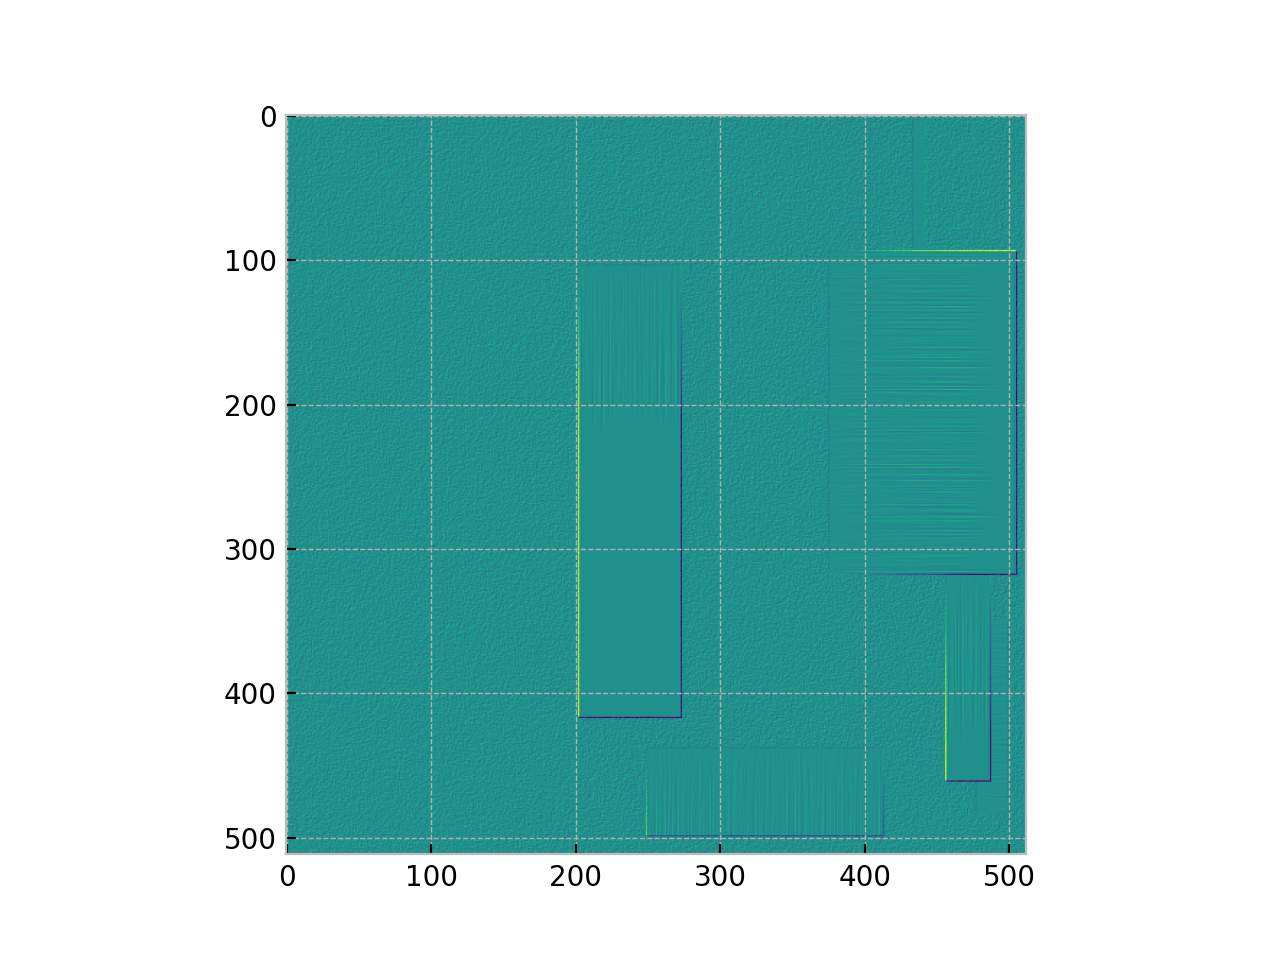

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(conv)

# 2: Edge detection/emphasis

Use the convolution function you wrote to create an edge detector. The edge detector is a function that takes an image as input and produces an image that is more intense where the input looks like it has an edge.

One solution:

In [19]:
def edge(x):
    ex = np.array([
        [-1, 1],
        [-1, 1]
    ])
    ey = np.array([
        [-1, -1],
        [1, 1]
    ])
    exy = np.array([
        [-1, 0],
        [0, 1]
    ])
    eyx = np.array([
        [0, -1],
        [1, 0]
    ])
    return np.sum(np.abs(np.array([
        convolution_2d(e, x) for e in [ex, ey, exy, eyx]
    ])), axis=0)

In [22]:
edges = edge(image)

<IPython.core.display.Javascript object>


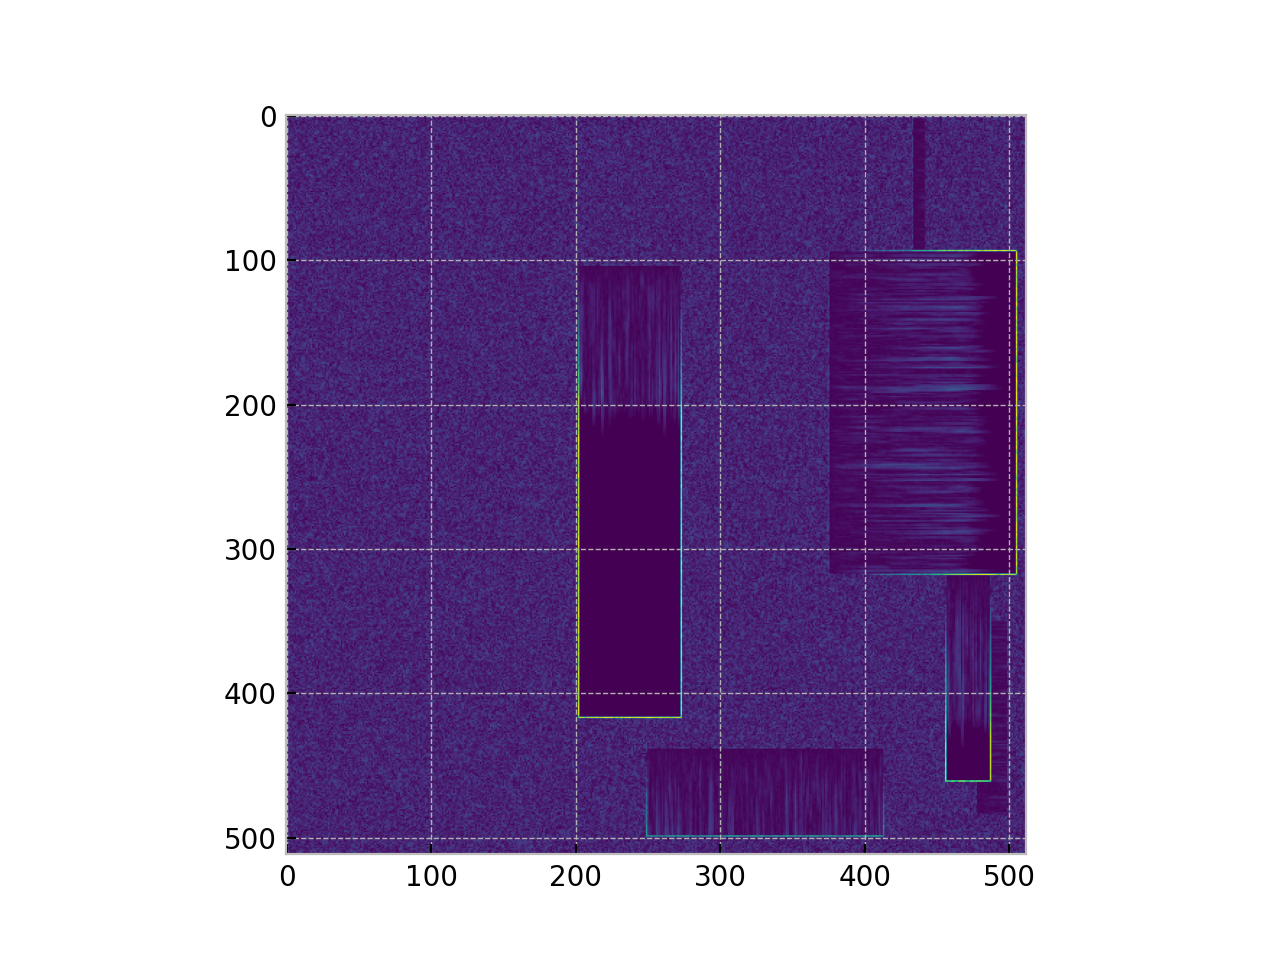

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(edges)